Linear Interpolation
作成者：津島亮太

関数を定義する

In [6]:
println(readall(`cmd /c type lin_int2.jl`))

function lin_inter(grid,vals)
    function func(x::Real)
        if x<grid[1]
            print("Error")
        elseif x>grid[n+1]
            print("Error")
        else index=searchsortedlast(grid,x)
            return (vals[index+1]-vals[index])/(grid[index+1]-grid[index])*(x-grid[index])+vals[index]
        end
    end

    function func{T<:Real}(x::AbstractVector{T})
        m=length(x)
        out=Array(Any,m)
        for i in 1:m
            out[i]=func(x[i])
        end
        return out
    end
    return func

end



In [7]:
include("lin_int2.jl")

lin_inter (generic function with 1 method)

In [8]:
f=lin_inter(grid,vals)

LoadError: LoadError: UndefVarError: vals not defined
while loading In[8], in expression starting on line 1

タイトルを入れるとLoadErrorになってしまう

プロットしてみる

In [9]:
g(x)=2*sin(x)+3*cos(2x)+1.5

g (generic function with 1 method)

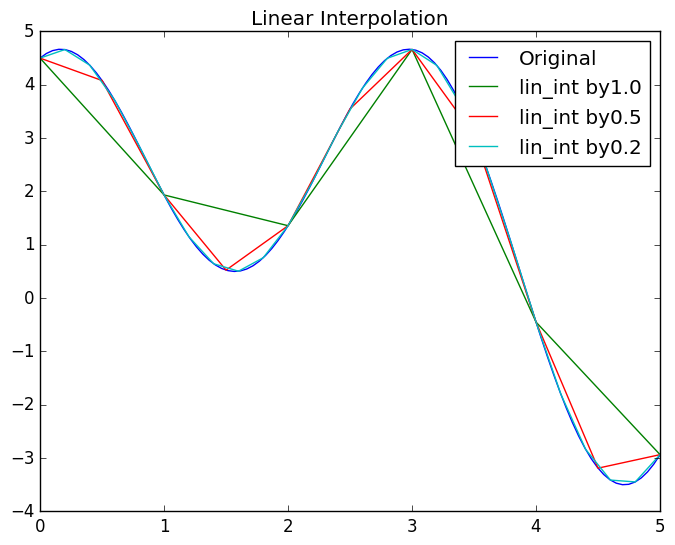

PyObject <matplotlib.legend.Legend object at 0x000000000FE8A860>

In [10]:
using PyPlot
x=linspace(0,5,100)
plot(x,g(x),label="Original")
units=[1,2,5]
for i in 1:3
    n=5*units[i]
    grid=Array(Float64,n+1)
    vals=Array(Float64,n+1)
    for j in 1:n+1
        grid[j]=(j-1)/units[i]
        vals[j]=g((j-1)/units[i])
    end
    x=linspace(0,5,100)
    plot(grid,vals,label="lin_int by$(1/units[i])")
end
title("Linear Interpolation")
legend()